In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
missing_values = ["NA", "n/a", "na", "?", "--",'nan']

In [3]:
print('helloword')

helloword


In [4]:
df = pd.read_excel('./dataset/has_linkedin.xlsx', na_values= missing_values)

In [5]:
df['linkedinJobTitle'].isna().value_counts()

False    661
True     386
Name: linkedinJobTitle, dtype: int64

In [6]:
df['linkedinSchoolDegree'] = df['linkedinSchoolDegree'].astype(str)
df['linkedinSchoolDegree'].fillna('NaN', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   linkedinProfileUrl               1047 non-null   object
 1   fullName                         1047 non-null   object
 2   Jurusan                          1047 non-null   object
 3   companyName                      662 non-null    object
 4   linkedinJobTitle                 661 non-null    object
 5   linkedinJobDateRange             668 non-null    object
 6   linkedinJobLocation              586 non-null    object
 7   location                         755 non-null    object
 8   linkedinSkillsLabel              646 non-null    object
 9   previousCompanyName              523 non-null    object
 10  linkedinPreviousJobTitle         502 non-null    object
 11  linkedinPreviousJobDateRange     520 non-null    object
 12  linkedinPreviousJobLocation      4

In [8]:
print(df['linkedinJobTitle'].isnull().sum())

386


In [9]:
df

,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,previousCompanyName,...,startSchoolDate,endSchoolDate,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan,Gaji,tingkatKeeratan
0,https://linkedin.com/in/regyta-permata-fujiani...,Regyta Permata Fujiani Hariyanto,S2 Manajemen,Telkom Foundation,Secretary Board Of Units Business Effectivenes...,Jan 2022 - Present,"Bandung, West Java, Indonesia","Bandung, West Java, Indonesia","Microsoft Office, Microsoft Excel, Leadership,...",Telkom Foundation,...,1905-07-11 00:00:00,2022,Telkom University,"Bachelor of Management, Management Business Te...",2015 - 2019,NaN,punya linkedin,multinasional,7jt - 10jt,Sangat Erat
1,https://linkedin.com/in/linalishobrina,"Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM",S2 Manajemen,Institut Teknologi Telkom Purwokerto,College Lecturer,Aug 2022 - Present,NaN,Jakarta Metropolitan Area,"Market Research, Marketing Strategy, Digital M...",MYG Studios,...,2020-08-01 00:00:00,2022,Telkom University,"Gelar Sarjana, Administrasi dan Manajemen Bisnis",2018 - 2019,NaN,punya linkedin,lokal,7jt - 10jt,Sangat Erat
2,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",Telkom Indonesia,...,2014-08-01 00:00:00,2018,NaN,NaN,NaN,NaN,punya linkedin,multinasional,4jt - 7jt,Sangat Erat
3,https://linkedin.com/in/nindyrestip,Nindy Resti Puranda,S2 Manajemen,Tempat Uji Kompetensi FEB Telkom University,Operational and Marketing Manager,Aug 2019 - Present,"Bandung, West Java, Indonesia","Siak, Riau, Indonesia","Event Planning, Banking, Credit Risk Managemen...",PT. Sigma Metrasys Solution,...,2019-01-01 00:00:00,2022,Telkom University,"Bachelor's degree, Business Administration, Ma...",Aug 2013 - Apr 2017,NaN,punya linkedin,nasional,10jt - 15jt,Sangat Erat
4,https://linkedin.com/in/aseprizal-nurjaman-785...,aseprizal nurjaman,S2 Informatika,PT. ARM Solusi,Web Developer,May 2016 - Present,bandung,"West Java, Indonesia","Flutter, Website Building, IT Hardware Support...",varIT,...,1905-07-11 00:00:00,2021,UNIVERSITAS PENDIDIKAN INDONESIA,"S.Kom, Ilmu Komputer",2012 - 2016,NaN,punya linkedin,nasional,7jt - 10jt,Sangat Erat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",JW Media Production,...,NaN,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Erat
1043,https://www.linkedin.com/in/ihsan-hanif-275920...,IHSAN HANIF,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN,NaN,NaN
1044,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,NaN,...,1905-07-11 00:00:00,2023,NaN,NaN,NaN,NaN,punya linkedin,nasional,4jt - 7jt,Sangat Erat
1045,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,NaN,...,1905-07-10 00:00:00,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Sangat Erat


In [10]:
print(df['linkedinJobTitle'].isna().sum())

386


In [11]:
null_strings = ['null']
df['linkedinJobTitle'].replace(null_strings, np.nan, inplace=True)

In [12]:
df['linkedinJobTitle'].isna().value_counts()

False    661
True     386
Name: linkedinJobTitle, dtype: int64

In [13]:
def categorize(row):
    if pd.isna(row['linkedinJobTitle']):
        return 'tidak bekerja'
    elif ('magister' in row['linkedinSchoolDegree'].lower() or
          'master' in row['linkedinSchoolDegree'].lower() or
          "master's" in row['linkedinSchoolDegree'].lower() or
          'mass' in row['linkedinSchoolDegree'].lower() ):
        return 'melanjutkan pendidikan'
    elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in str(row['linkedinJobTitle']).lower() and
          'founder' not in str(row['linkedinJobTitle']).lower() and
          'co-founder' not in str(row['linkedinJobTitle']).lower() and
          ('magister' not in row['linkedinSchoolDegree'].lower() and
           'master' not in row['linkedinSchoolDegree'].lower() and
           "master's" not in row['linkedinSchoolDegree'].lower() and
           'mass' not in row['linkedinSchoolDegree'].lower()) ):
        return 'Bekerja'
    elif (pd.notna(row['linkedinJobTitle']) and 
          ('owner' in str(row['linkedinJobTitle']).lower() or
           'founder' in str(row['linkedinJobTitle']).lower() or
           'co-founder' in str(row['linkedinJobTitle']).lower())):
        return 'wiraswasta'
    else:
        return 'lainnya'

# Tambahkan kolom label kategori
df['status'] = df.apply(categorize, axis=1)

print(df)

                                     linkedinProfileUrl  \
0     https://linkedin.com/in/regyta-permata-fujiani...   
1                https://linkedin.com/in/linalishobrina   
2               https://linkedin.com/in/anadurrotulisma   
3                   https://linkedin.com/in/nindyrestip   
4     https://linkedin.com/in/aseprizal-nurjaman-785...   
...                                                 ...   
1042     https://linkedin.com/in/widianasalasanurrahmah   
1043  https://www.linkedin.com/in/ihsan-hanif-275920...   
1044          https://www.linkedin.com/in/tiara-azzani/   
1045  https://www.linkedin.com/in/twulan20/?locale=e...   
1046  https://www.linkedin.com/in/farsya-billah-49b9...   

                                              fullName  \
0                     Regyta Permata Fujiani Hariyanto   
1     Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM   
2                                    Ana Durrotul Isma   
3                                  Nindy Resti Puranda   
4

In [14]:
# s2 MELANJUTKAN PENDIDIKAN
# def categorize(row):
#     if pd.isna(row['linkedinJobTitle']):
#         return 'tidak bekerja'
#     elif ('magister' in row['linkedinSchoolDegree'].lower() or
#           'master' in row['linkedinSchoolDegree'].lower() or
#           "master's" in row['linkedinSchoolDegree'].lower() or
#           'mass' in row['linkedinSchoolDegree'].lower() or
#           's2' in row['Jurusan'].lower()):
#         return 'melanjutkan pendidikan'
#     elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in str(row['linkedinJobTitle']).lower() and
#           'founder' not in str(row['linkedinJobTitle']).lower() and
#           'co-founder' not in str(row['linkedinJobTitle']).lower() and
#           ('magister' not in row['linkedinSchoolDegree'].lower() and
#            'master' not in row['linkedinSchoolDegree'].lower() and
#            "master's" not in row['linkedinSchoolDegree'].lower() and
#            'mass' not in row['linkedinSchoolDegree'].lower()) and
#           ('s2' not in row['Jurusan'].lower())):
#         return 'Bekerja'
#     elif (pd.notna(row['linkedinJobTitle']) and 
#           ('owner' in str(row['linkedinJobTitle']).lower() or
#            'founder' in str(row['linkedinJobTitle']).lower() or
#            'co-founder' in str(row['linkedinJobTitle']).lower())):
#         return 'wiraswasta'
#     else:
#         return 'lainnya'

# # Tambahkan kolom label kategori
# df['status'] = df.apply(categorize, axis=1)

# print(df)

In [15]:
# def categorize(row):
#     if ('magister' in row['linkedinSchoolDegree'].lower() or
#         'master' in row['linkedinSchoolDegree'].lower() or
#         "master's" in row['linkedinSchoolDegree'].lower() or
#         'mass' in row['linkedinSchoolDegree'].lower() or
#         's2' in row['linkedinSchoolDegree'].lower()):
#         return 'melanjutkan pendidikan'
#     elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in row['linkedinJobTitle'].lower() and
#           ('magister' not in row['linkedinSchoolDegree'].lower() and
#            'master' not in row['linkedinSchoolDegree'].lower() and
#            "master's" not in row['linkedinSchoolDegree'].lower() and
#            'mass' not in row['linkedinSchoolDegree'].lower()) and
#           ('s2' not in row['linkedinSchoolDegree'].lower())):
#         return 'Bekerja'
#     elif (pd.notna(row['linkedinJobTitle']) and ('owner' in row['linkedinJobTitle'].lower() or 
#           'founder' in row['linkedinJobTitle'].lower() or
#           'co-founder' in row['linkedinJobTitle'].lower())):
#         return 'wiraswasta'
#     elif pd.isna(row['linkedinJobTitle']):
#         return 'tidak bekerja'
#     else:
#         return 'lainnya'

# # Tambahkan kolom label kategori
# df['status'] = df.apply(categorize, axis=1)

# print(df)

In [16]:
df

,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,previousCompanyName,...,endSchoolDate,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan,Gaji,tingkatKeeratan,status
0,https://linkedin.com/in/regyta-permata-fujiani...,Regyta Permata Fujiani Hariyanto,S2 Manajemen,Telkom Foundation,Secretary Board Of Units Business Effectivenes...,Jan 2022 - Present,"Bandung, West Java, Indonesia","Bandung, West Java, Indonesia","Microsoft Office, Microsoft Excel, Leadership,...",Telkom Foundation,...,2022,Telkom University,"Bachelor of Management, Management Business Te...",2015 - 2019,NaN,punya linkedin,multinasional,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
1,https://linkedin.com/in/linalishobrina,"Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM",S2 Manajemen,Institut Teknologi Telkom Purwokerto,College Lecturer,Aug 2022 - Present,NaN,Jakarta Metropolitan Area,"Market Research, Marketing Strategy, Digital M...",MYG Studios,...,2022,Telkom University,"Gelar Sarjana, Administrasi dan Manajemen Bisnis",2018 - 2019,NaN,punya linkedin,lokal,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
2,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",Telkom Indonesia,...,2018,NaN,NaN,NaN,NaN,punya linkedin,multinasional,4jt - 7jt,Sangat Erat,Bekerja
3,https://linkedin.com/in/nindyrestip,Nindy Resti Puranda,S2 Manajemen,Tempat Uji Kompetensi FEB Telkom University,Operational and Marketing Manager,Aug 2019 - Present,"Bandung, West Java, Indonesia","Siak, Riau, Indonesia","Event Planning, Banking, Credit Risk Managemen...",PT. Sigma Metrasys Solution,...,2022,Telkom University,"Bachelor's degree, Business Administration, Ma...",Aug 2013 - Apr 2017,NaN,punya linkedin,nasional,10jt - 15jt,Sangat Erat,melanjutkan pendidikan
4,https://linkedin.com/in/aseprizal-nurjaman-785...,aseprizal nurjaman,S2 Informatika,PT. ARM Solusi,Web Developer,May 2016 - Present,bandung,"West Java, Indonesia","Flutter, Website Building, IT Hardware Support...",varIT,...,2021,UNIVERSITAS PENDIDIKAN INDONESIA,"S.Kom, Ilmu Komputer",2012 - 2016,NaN,punya linkedin,nasional,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",JW Media Production,...,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Erat,Bekerja
1043,https://www.linkedin.com/in/ihsan-hanif-275920...,IHSAN HANIF,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN,NaN,NaN,tidak bekerja
1044,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,NaN,...,2023,NaN,NaN,NaN,NaN,punya linkedin,nasional,4jt - 7jt,Sangat Erat,Bekerja
1045,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,NaN,...,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Sangat Erat,Bekerja


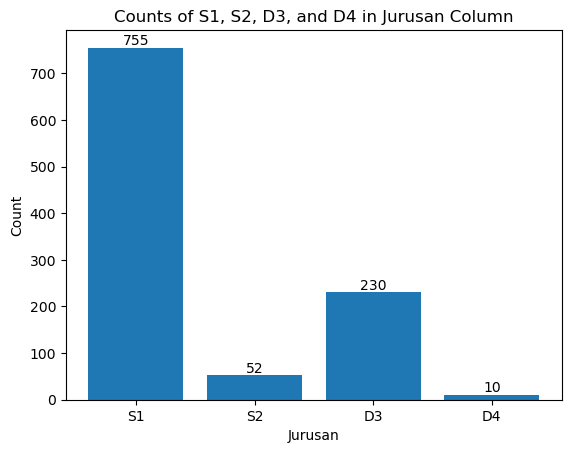

In [17]:
import seaborn as sns
count_S1 = df[df['Jurusan'].str.contains('S1')]['Jurusan'].count()
count_S2 = df[df['Jurusan'].str.contains('S2')]['Jurusan'].count()
count_D3 = df[df['Jurusan'].str.contains('D3')]['Jurusan'].count()
count_D4 = df[df['Jurusan'].str.contains('D4')]['Jurusan'].count()

# Create a bar chart
categories = ['S1', 'S2', 'D3', 'D4']
counts = [count_S1, count_S2, count_D3, count_D4]

plt.bar(categories, counts)
plt.xlabel('Jurusan')
plt.ylabel('Count')
plt.title('Counts of S1, S2, D3, and D4 in Jurusan Column')

# Display counts above the bars
for i in range(len(categories)):
    plt.text(categories[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

In [18]:
sns.barplot(x=categories, y=counts, hue=df['label_linkedin'])

KeyError: 'S1'

In [ ]:
# def categorize(row):
#     if pd.isna(row['linkedinJobTitle']):
#         return 'tidak bekerja'
#     elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in row['linkedinJobTitle'].lower() and
#           ('magister' not in row['linkedinSchoolDegree'].lower() and
#            'master' not in row['linkedinSchoolDegree'].lower() and
#            "master's" not in row['linkedinSchoolDegree'].lower() and
#            'mass' not in row['linkedinSchoolDegree'].lower()) and
#           ('s2' not in row['linkedinSchoolDegree'].lower())):
#         return 'Bekerja'
#     elif pd.notna(row['linkedinJobTitle']) and 'owner' in row['linkedinJobTitle'].lower():
#         return 'wiraswasta'
#     elif ('magister' in row['linkedinSchoolDegree'].lower() or
#         'master' in row['linkedinSchoolDegree'].lower() or
#         "master's" in row['linkedinSchoolDegree'].lower() or
#         'mass' in row['linkedinSchoolDegree'].lower() or
#         's2' in row['linkedinSchoolDegree'].lower()):
#         return 'melanjutkan pendidikan'
#     else:
#         return 'lainnya'

# # Tambahkan kolom label kategori
# df['status'] = df.apply(categorize, axis=1)

# print(df)

In [ ]:
df['status'].value_counts()

Bekerja                   594
tidak bekerja             386
melanjutkan pendidikan     54
wiraswasta                 13
Name: status, dtype: int64

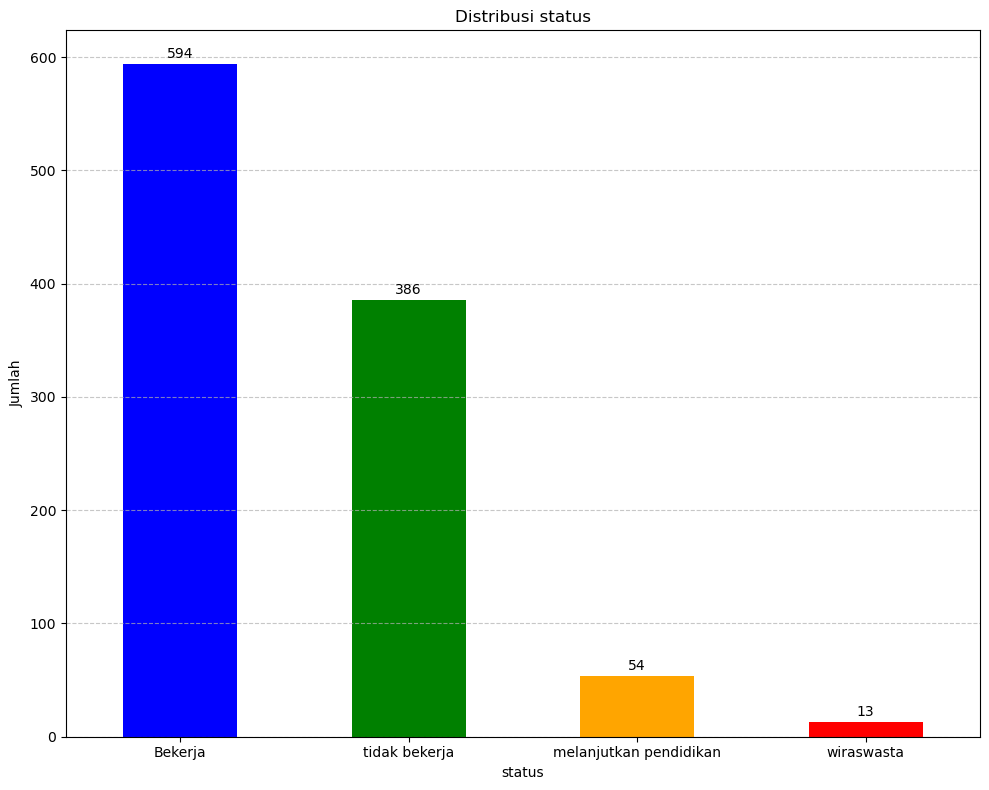

In [ ]:
status_counts = df['status'].value_counts()

# Buat plot dan atur ukuran figure
plt.figure(figsize=(10, 8))

ax = status_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan label jumlah pada setiap batang bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('status')
plt.ylabel('Jumlah')
plt.title('Distribusi status')

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur warna axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Mengatur label status menjadi vertikal
plt.xticks(rotation=0, ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
print(df['linkedinJobTitle'][df['status'] == 'wiraswasta'])

182                        Co-Founder
224                     Founder & CEO
234                           Founder
246                             Owner
263      Business Owner and Marketing
306                    Business Owner
443                           Founder
749                             Owner
841                    Business Owner
854    Co-Founder & Creative Director
903              Small Business Owner
947                    Business Owner
985                             Owner
Name: linkedinJobTitle, dtype: object


In [ ]:
print(df['fullName'][df['status'] == 'tidak bekerja'])

9                       Rezha Aulia
11               Aditia Nur Alamsah
20           Keifee Bintang Tamarra
21                  Farhan Nurhildi
23               Fia izzah Maylinda
                   ...             
1001          Salsabila Fairuzsalwa
1002          Zetta Andalusia Zahra
1011    fiqshallah suyendra apriano
1012             MUH TAUFIK HIDAYAT
1043                    IHSAN HANIF
Name: fullName, Length: 386, dtype: object


In [ ]:
print(df['linkedinSchoolName'][df['status'] == 'melanjutkan pendidikan'])

0                Telkom University
1                Telkom University
3                Telkom University
4                Telkom University
7                Telkom University
8                Telkom University
13               Telkom University
14               Telkom University
15               Telkom University
16               Telkom University
17               Telkom University
18               Telkom University
19               Telkom University
92               Telkom University
247              Telkom University
274              Telkom University
275              Telkom University
301     Institut Teknologi Bandung
457              Telkom University
458              Telkom University
460              Telkom University
462              Telkom University
463              Telkom University
464              Telkom University
465              Telkom University
466              Telkom University
467              Telkom University
468              Telkom University
470              Tel

In [ ]:
# company terbanyak
company_counts = df['companyName'].value_counts()
top_company = company_counts.head(15)
top_company

Telkom Indonesia                               44
Freelance                                      15
Universitas Telkom                             13
Telkom University                               8
TransTRACK.ID                                   4
Dinas Komunikasi dan Informatika                4
PT Bank Mandiri (Persero) Tbk.                  4
Maybank                                         3
PCMan Indonesia                                 3
bank bjb                                        3
Orbit360                                        3
Telkomsel                                       3
Dinas Perdagangan Pemerintah Kota Surakarta     2
PT. Sigma Cipta Caraka (Telkomsigma)            2
Leverate Media Asia                             2
Name: companyName, dtype: int64

In [ ]:
print(df['linkedinJobTitle'][df['companyName'] == 'Universitas Telkom'])

197                              Human Resources Benefits
320                    Staff Project Data dan Performansi
329                                       Marketing Staff
356     Practicum Assistant of Cellular Communication ...
377                                             Assistant
410                                    Practice Assistant
422                Practicum Assistant  Resource Planning
737                   Asisten Praktikum Digital Marketing
746     Practicum Assistant of Advertising and Busines...
833                                  Laboratory Assistant
837                                                   NaN
839                                    Assistant Lecturer
1033                                     Public Relations
Name: linkedinJobTitle, dtype: object


In [ ]:
print(df['linkedinJobTitle'][df['companyName'] == 'Telkom University'])

8      Research Assistant Lecturer
286       Admin Kantin (Marketing)
419             Accounting Officer
457              Parttime Lecturer
463             Admissions Officer
847              Lecture Assistant
874                 Marketing Crew
919                        Student
Name: linkedinJobTitle, dtype: object


In [ ]:
# company terbanyak


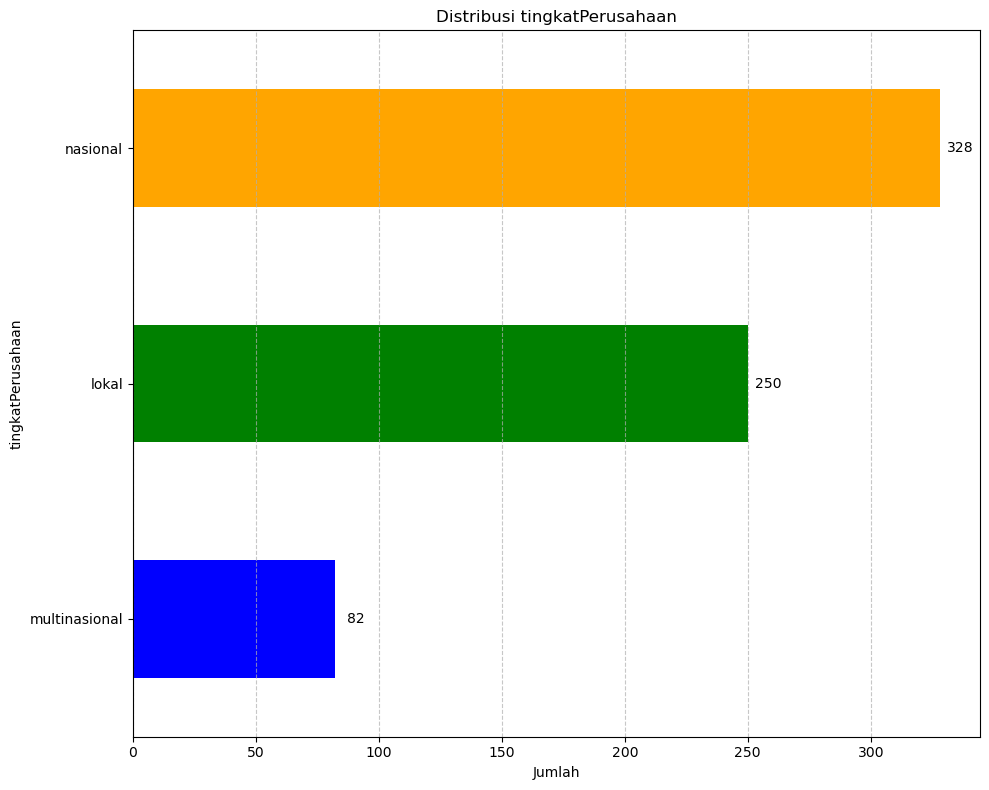

In [ ]:
tingkatPerusahaan_counts = df['tingkatPerusahaan'].value_counts()

# Buat plot dan atur ukuran figure
plt.figure(figsize=(10, 8))

ax = tingkatPerusahaan_counts.sort_values().plot(kind='barh', color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan label jumlah pada setiap batang bar
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='center', xytext=(15, 0), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('Jumlah')
plt.ylabel('tingkatPerusahaan')
plt.title('Distribusi tingkatPerusahaan')

# # Menambahkan legend
# plt.legend()

# Menambahkan grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mengatur warna axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# tingkatPerusahaan_counts = df['tingkatPerusahaan'].value_counts()

# # Buat plot dan atur ukuran figure
# plt.figure(figsize=(10, 8))

# ax = tingkatPerusahaan_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])

# # Menambahkan label jumlah pada setiap batang bar
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

# plt.xlabel('tingkatPerusahaan')
# plt.ylabel('Jumlah')
# plt.title('Distribusi tingkatPerusahaan')

# # Menambahkan legend
# plt.legend()

# # Menambahkan grid
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Mengatur warna axis tick labels
# ax.tick_params(axis='x', colors='black')
# ax.tick_params(axis='y', colors='black')

# # Mengatur label status menjadi vertikal
# plt.xticks(rotation=90, ha='center')

# # Menampilkan plot
# plt.tight_layout()
# plt.show()

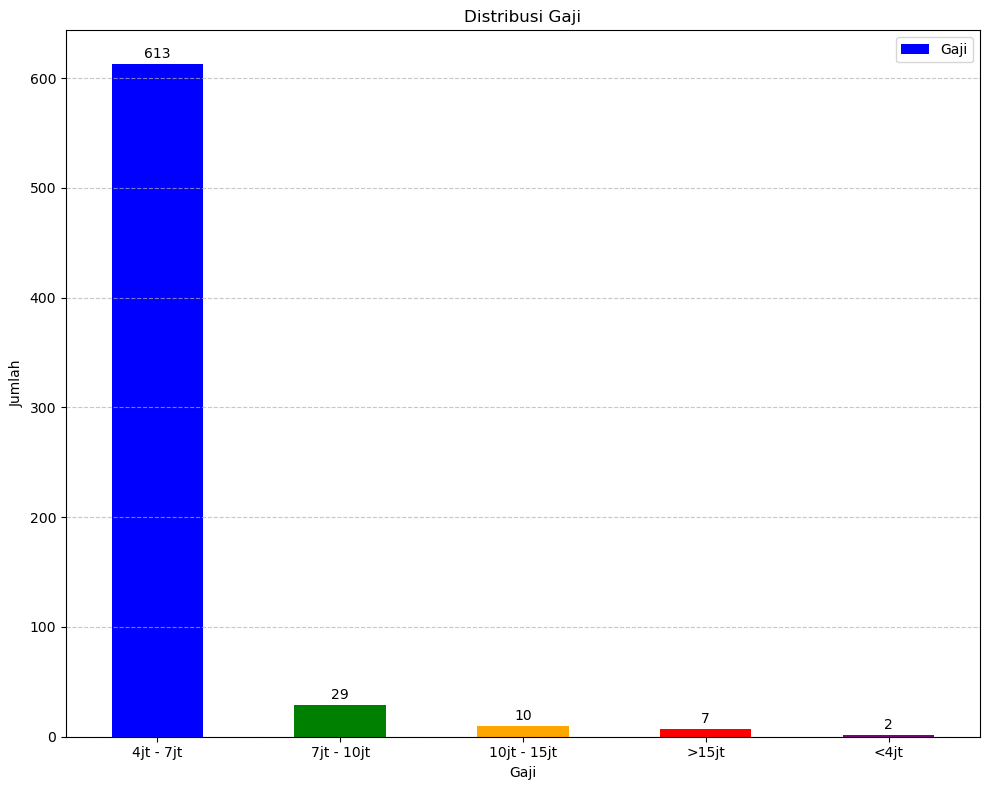

In [ ]:
Gaji_counts = df['Gaji'].value_counts()

# Buat plot dan atur ukuran figure
plt.figure(figsize=(10, 8))

ax = Gaji_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan label jumlah pada setiap batang bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('Gaji')
plt.ylabel('Jumlah')
plt.title('Distribusi Gaji')

# Menambahkan legend
plt.legend()

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur warna axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Mengatur label status menjadi vertikal
plt.xticks(rotation=0, ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
df

,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,previousCompanyName,...,endSchoolDate,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan,Gaji,tingkatKeeratan,status
0,https://linkedin.com/in/regyta-permata-fujiani...,Regyta Permata Fujiani Hariyanto,S2 Manajemen,Telkom Foundation,Secretary Board Of Units Business Effectivenes...,Jan 2022 - Present,"Bandung, West Java, Indonesia","Bandung, West Java, Indonesia","Microsoft Office, Microsoft Excel, Leadership,...",Telkom Foundation,...,2022,Telkom University,"Bachelor of Management, Management Business Te...",2015 - 2019,NaN,punya linkedin,multinasional,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
1,https://linkedin.com/in/linalishobrina,"Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM",S2 Manajemen,Institut Teknologi Telkom Purwokerto,College Lecturer,Aug 2022 - Present,NaN,Jakarta Metropolitan Area,"Market Research, Marketing Strategy, Digital M...",MYG Studios,...,2022,Telkom University,"Gelar Sarjana, Administrasi dan Manajemen Bisnis",2018 - 2019,NaN,punya linkedin,lokal,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
2,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",Telkom Indonesia,...,2018,NaN,NaN,NaN,NaN,punya linkedin,multinasional,4jt - 7jt,Sangat Erat,Bekerja
3,https://linkedin.com/in/nindyrestip,Nindy Resti Puranda,S2 Manajemen,Tempat Uji Kompetensi FEB Telkom University,Operational and Marketing Manager,Aug 2019 - Present,"Bandung, West Java, Indonesia","Siak, Riau, Indonesia","Event Planning, Banking, Credit Risk Managemen...",PT. Sigma Metrasys Solution,...,2022,Telkom University,"Bachelor's degree, Business Administration, Ma...",Aug 2013 - Apr 2017,NaN,punya linkedin,nasional,10jt - 15jt,Sangat Erat,melanjutkan pendidikan
4,https://linkedin.com/in/aseprizal-nurjaman-785...,aseprizal nurjaman,S2 Informatika,PT. ARM Solusi,Web Developer,May 2016 - Present,bandung,"West Java, Indonesia","Flutter, Website Building, IT Hardware Support...",varIT,...,2021,UNIVERSITAS PENDIDIKAN INDONESIA,"S.Kom, Ilmu Komputer",2012 - 2016,NaN,punya linkedin,nasional,7jt - 10jt,Sangat Erat,melanjutkan pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",JW Media Production,...,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Erat,Bekerja
1043,https://www.linkedin.com/in/ihsan-hanif-275920...,IHSAN HANIF,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN,NaN,NaN,tidak bekerja
1044,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,NaN,...,2023,NaN,NaN,NaN,NaN,punya linkedin,nasional,4jt - 7jt,Sangat Erat,Bekerja
1045,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,NaN,...,2022,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Sangat Erat,Bekerja


In [ ]:
# filter data lulusan sudah bekerja
df_bekerja = df[df['status'] == 'Bekerja']

#label waktu tunggu lulusan
# Fungsi untuk memberi label kategori
def label_kategori(row):
    if row['endSchoolDate'] <= 2022:
        return '4 bulan'
    elif row['endSchoolDate'] >= 2023:
        return '3 bulan'
    else:
        return 'Tidak dikategorikan'

# Menerapkan fungsi pada setiap baris data
df_bekerja['waktu_tunggu_lulusan_bekerja'] = df_bekerja.apply(label_kategori, axis=1)

print(df_bekerja)

                                     linkedinProfileUrl  \
2               https://linkedin.com/in/anadurrotulisma   
5                      https://linkedin.com/in/sitinurh   
6     https://linkedin.com/in/jasmine-raisya-salsabi...   
10              https://linkedin.com/in/astri-wulandari   
12          https://linkedin.com/in/melati-sabila-putri   
...                                                 ...   
1041             https://linkedin.com/in/nukmaameliasaf   
1042     https://linkedin.com/in/widianasalasanurrahmah   
1044          https://www.linkedin.com/in/tiara-azzani/   
1045  https://www.linkedin.com/in/twulan20/?locale=e...   
1046  https://www.linkedin.com/in/farsya-billah-49b9...   

                          fullName                      Jurusan  \
2                Ana Durrotul Isma                 S2 Manajemen   
5                 Siti Nur Hamidah           S2 Teknik Industri   
6         Jasmine Raisya Salsabila           S2 Teknik Industri   
10                 Astr

/tmp/ipykernel_1794/1265894665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bekerja['waktu_tunggu_lulusan_bekerja'] = df_bekerja.apply(label_kategori, axis=1)


In [ ]:
df_bekerja

,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,previousCompanyName,...,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan,Gaji,tingkatKeeratan,status,waktu_tunggu_lulusan_bekerja
2,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",Telkom Indonesia,...,NaN,NaN,NaN,NaN,punya linkedin,multinasional,4jt - 7jt,Sangat Erat,Bekerja,4 bulan
5,https://linkedin.com/in/sitinurh,Siti Nur Hamidah,S2 Teknik Industri,PT. Diamond International Indonesia (PUMA),Purchasing Staff,Dec 2021 - Present,NaN,"Bandung, West Java, Indonesia","Microsoft Office, Microsoft Word, Microsoft Po...",PT. Diamond International Indonesia (PUMA),...,SMA Negeri 1 Majalengka,IPA,2013 - 2016,NaN,punya linkedin,multinasional,7jt - 10jt,Erat,Bekerja,4 bulan
6,https://linkedin.com/in/jasmine-raisya-salsabi...,Jasmine Raisya Salsabila,S2 Teknik Industri,Business Simulation Laboratory,Laboratory Assistant,Feb 2019 - Feb 2020,"West Java, Indonesia","West Java, Indonesia",NaN,NaN,...,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Erat,Bekerja,4 bulan
10,https://linkedin.com/in/astri-wulandari,Astri Wulandari,S2 Teknik Elektro,Ericsson,Network Engineer,Jul 2022 - Present,"Jakarta, Indonesia","Jakarta, Indonesia","LaTeX, HTML, JavaScript, Teaching, Data Analys...",Mobile Communication Laboratory,...,Telkom University,"Master's degree, Electrical Engineering",2021 - 2022,NaN,punya linkedin,multinasional,7jt - 10jt,Sangat Erat,Bekerja,4 bulan
12,https://linkedin.com/in/melati-sabila-putri,Melati Sabila Putri,S2 Teknik Elektro,Kementerian Perdagangan Republik Indonesia,Research Assistant,Nov 2021 - Dec 2021,Indonesia,"West Java, Indonesia","Interpersonal Skills, Problem Solving, Communi...",Institut Teknologi Bandung (ITB),...,NaN,NaN,NaN,NaN,punya linkedin,nasional,7jt - 10jt,Cukup Erat,Bekerja,4 bulan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,https://linkedin.com/in/nukmaameliasaf,Nukma Amelia Safitri Sagita,S1 Ilmu Komunikasi,Radio Republik Indonesia,Script Writer,May 2021 - Aug 2021,Indonesia,"Bandung, West Java, Indonesia","Strategi Pemasaran, Desain, Blogging, Pemasara...",NaN,...,NaN,NaN,NaN,NaN,punya linkedin,nasional,4jt - 7jt,Erat,Bekerja,4 bulan
1042,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",JW Media Production,...,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Erat,Bekerja,4 bulan
1044,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,punya linkedin,nasional,4jt - 7jt,Sangat Erat,Bekerja,3 bulan
1045,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,punya linkedin,lokal,4jt - 7jt,Sangat Erat,Bekerja,4 bulan


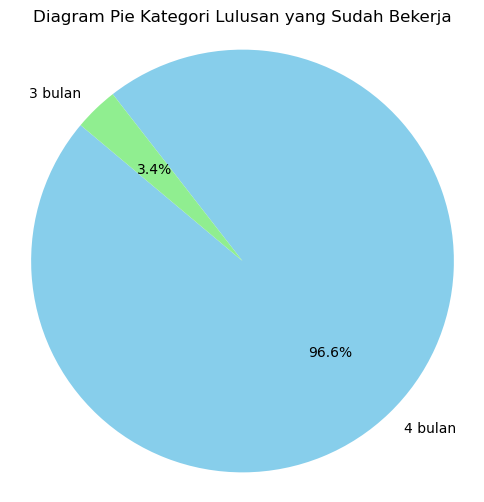

In [ ]:
waktu_tunggu_lulusan_bekerja_counts = df_bekerja['waktu_tunggu_lulusan_bekerja'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(waktu_tunggu_lulusan_bekerja_counts, labels=waktu_tunggu_lulusan_bekerja_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Diagram Pie Kategori Lulusan yang Sudah Bekerja')
plt.axis('equal')  # Agar pie chart menjadi lingkaran sempurna

# Menampilkan pie chart
plt.show()

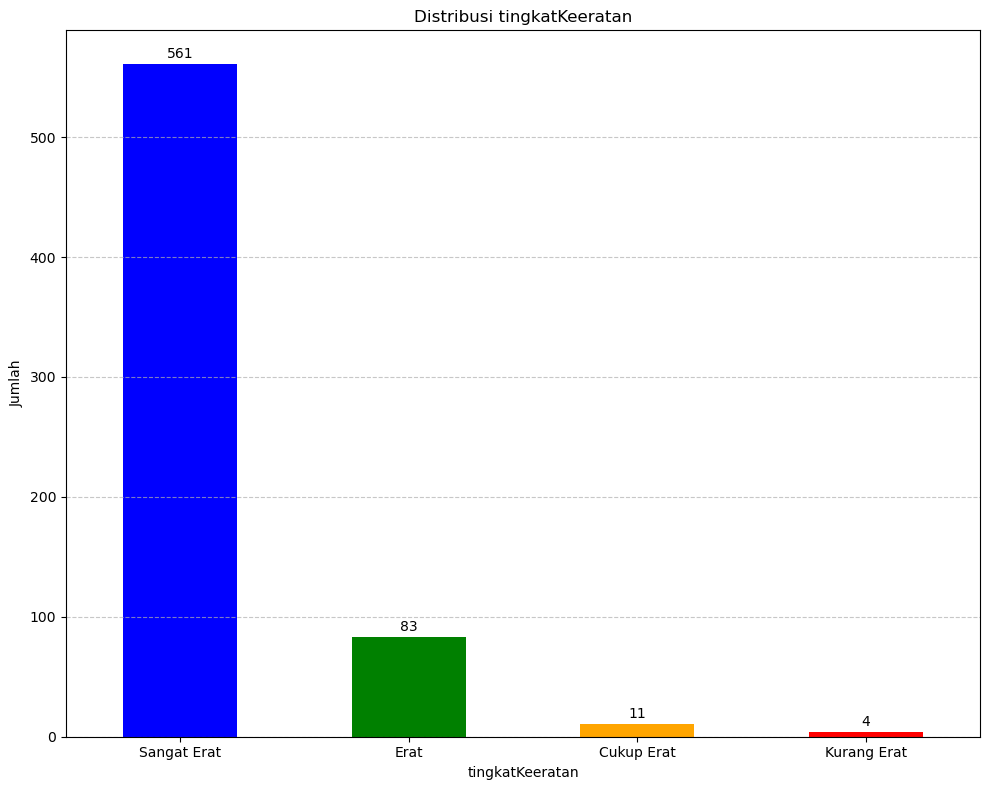

In [ ]:
tingkatKeeratan_counts = df['tingkatKeeratan'].value_counts()

# Buat plot dan atur ukuran figure
plt.figure(figsize=(10, 8))

ax = tingkatKeeratan_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan label jumlah pada setiap batang bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('tingkatKeeratan')
plt.ylabel('Jumlah')
plt.title('Distribusi tingkatKeeratan')

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur warna axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Mengatur label status menjadi vertikal
plt.xticks(rotation=0, ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
print(df['companyName'][df['status'] == 'wiraswasta'])

182            Tenteram abadi
224          Dinotis Official
234            Laneira Coffee
246        Sumber Tani Bekasi
263    Mixnum Boba x Takochan
306              Serata Hijab
443               T.O.M Group
749      Glowbeauty treatment
841          Omah Ndog Studio
854               Musixession
903              Sw Cake Bali
947                Kanlive.id
985                   VespaFs
Name: companyName, dtype: object


In [19]:
def jabatan(row):
    if ('freelance' in row['linkedinJobTitle'].lower() or
          'Freelance' in row['linkedinJobTitle'].lower() ):
        return 'Freelance'
    elif ('owner' in row['linkedinJobTitle'].lower() or
          'founder' in row['linkedinJobTitle'].lower() or 'ceo' in row['linkedinJobTitle'].lower()
          or 'manager' in row['linkedinJobTitle'].lower() or 'Co-Founder' in row['linkedinJobTitle'].lower()
          ):
        return 'Setingkat Manager'
    else:
        return 'Staff'

# Tambahkan kolom label kategori
df['Posisi_kerja'] = df.apply(jabatan, axis=1)

print(df)

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
# from geopy.geocoders import Nominatim
# import folium


# # Inisialisasi geocoder Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Fungsi untuk mendapatkan koordinat geografis
# def get_coordinates(location):
#     try:
#         location = geolocator.geocode(location)
#         if location:
#             return location.latitude, location.longitude
#         else:
#             return None, None
#     except Exception as e:
#         return None, None

# # Dapatkan koordinat geografis untuk setiap lokasi
# df['latitude'], df['longitude'] = zip(*df['linkedinJobLocation'].apply(get_coordinates))

# # Hapus baris dengan koordinat yang tidak berhasil didapatkan
# df = df.dropna(subset=['latitude', 'longitude'])

# # Buat peta
# m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# # Tambahkan marker untuk setiap lokasi
# for _, row in df.iterrows():
#     folium.Marker([row['latitude'], row['longitude']], popup=row['linkedinJobLocation']).add_to(m)

# # Tampilkan peta
# m.save('job_location_map.html')

In [ ]:
# from geopandas.tools import geocode

# # Geocode lokasi menggunakan GeoPandas
# gdf = geocode(df['linkedinJobLocation'], provider='nominatim', user_agent='myGeocoder')

# # Buat peta
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(figsize=(10, 6), color='white', edgecolor='black')

# # Plot marker pada peta
# gdf.plot(ax=ax, marker='o', color='red', markersize=50)

# # Tampilkan peta
# plt.show()